# Problem Statement:

You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

# Features:

- Name: The brand and model of the car.

- Location: The location in which the car is being sold or is available for purchase.

- Year: The year or edition of the model.

- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

- Fuel_Type: The type of fuel used by the car.

- Transmission: The type of transmission used by the car.

- Owner_Type: Whether the ownership is Firsthand, Second hand or other.

- Mileage: The standard mileage offered by the car company in kmpl or km/kg

- Engine: The displacement volume of the engine in cc.

- Power: The maximum power of the engine in bhp.

- Seats: The number of seats in the car.

- Price: The price of the used car in INR Lakhs.

# Data Handling:

In [1020]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1021]:
rn=pd.read_excel("Data_Train.xlsx")
df1=pd.read_excel("Data_Test.xlsx")
rn.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [1022]:
df=rn.copy()

In [1023]:
print(df.columns)
df.shape,df1.shape

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


((6019, 12), (1234, 11))

In [1024]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [1025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [1026]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [1027]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [1028]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

# ---------------------------------------------------------------------------------------------------------------

# Analyzing the data and removing the outliers:

In [1029]:
print(df['Seats'].mean())
print(df['Seats'].median())

5.278735151413753
5.0


In [1030]:
df['Seats'].fillna('5',inplace=True)

In [1031]:
df['Seats']=df['Seats'].astype(int)

In [1032]:
df.Seats.sort_values()

3999     0
5781     2
5294     2
134      2
693      2
        ..
2267    10
917     10
2575    10
1907    10
814     10
Name: Seats, Length: 6019, dtype: int32

- lets remove row no. 3999, it is possibly the outlier present in the data.

In [1033]:
df=df.drop(3999,axis=0)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5,2.65


In [1034]:
df['Mileage'].fillna('-1',inplace=True)
df['Engine'].fillna('-1',inplace=True)
df['Power'].fillna('-1',inplace=True)
df['Power'] = df['Power'].replace("null bhp", "-1 bhp")

In [1035]:
df['Mileage']=df.Mileage.str.split(expand=True).get(0).astype(float)
df['Engine']=df.Engine.str.split(expand=True).get(0)
df['Power']=df.Power.str.split(expand=True).get(0)

In [1036]:
df['Engine']=pd.to_numeric(df['Engine'])
df['Power']=pd.to_numeric(df['Power'])

In [1037]:
print(df['Mileage'].mean())
print(df['Mileage'].median())
print(df['Engine'].mean())
print(df['Engine'].median())
print(df['Power'].mean())
print(df['Power'].median())

18.12987038883355
18.15
1611.3100697906282
1493.0
110.55714855433615
91.1


In [1038]:
print(df['Price'].mean())
print(df['Price'].std())
print(df['Price'].median())
print(df['Price'].min())
print(df['Price'].max())
df.Price.sort_values()

9.478052509139232
11.18830747822286
5.64
0.44
160.0


1713      0.44
2847      0.45
1628      0.45
3138      0.45
3228      0.50
         ...  
1974     93.67
1505     97.07
5919    100.00
5781    120.00
4079    160.00
Name: Price, Length: 6018, dtype: float64

- lets remove row no. 5781 and row no. 4079 as the price is too high, they are possibly the outliers present in the data.

In [1039]:
df=df.drop(5781,axis=0)
df=df.drop(4079,axis=0)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [1040]:
df['Mileage'] = df['Mileage'].replace("-1", "18.12")
df['Engine'] = df['Engine'].replace("-1", "1611")
df['Power'] = df['Power'].replace("-1", "110.54")

In [1041]:
df['Engine']=df['Engine'].astype('int')

In [1042]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6016 non-null   object 
 1   Location           6016 non-null   object 
 2   Year               6016 non-null   int64  
 3   Kilometers_Driven  6016 non-null   int64  
 4   Fuel_Type          6016 non-null   object 
 5   Transmission       6016 non-null   object 
 6   Owner_Type         6016 non-null   object 
 7   Mileage            6016 non-null   float64
 8   Engine             6016 non-null   int32  
 9   Power              6016 non-null   float64
 10  Seats              6016 non-null   int32  
 11  Price              6016 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 564.0+ KB


In [1043]:
df['Engine']=df['Engine'].replace(-1,1611)

In [1044]:
x=df.Mileage.sort_values()
x.head(71)

4446   -1.0
4904   -1.0
3189    0.0
962     0.0
3210    0.0
       ... 
5022    0.0
5016    0.0
707     0.0
3522    0.0
5603    7.5
Name: Mileage, Length: 71, dtype: float64

- We can remove 70 rows as mileage is never negative nor zero.

In [1045]:
df=df[df.Mileage!=0]
df=df[df.Mileage!=1]
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [1046]:
df.Engine.sort_values()

4446      72
112      624
2322     624
41       624
1458     624
        ... 
5919    5000
4691    5461
4722    5461
152     5461
5521    5998
Name: Engine, Length: 5948, dtype: int32

- removing row 4436, 5521 as they are possibly the outliers in the data.

In [1047]:
df=df.drop(4436,axis=0)
df=df.drop(5521,axis=0)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [1048]:
x=df.Kilometers_Driven.sort_values()
x.tail(10)

1975     282000
1528     299322
3649     300000
4491     445000
2823     480000
3092     480000
358      620000
1860     720000
340      775000
2328    6500000
Name: Kilometers_Driven, dtype: int64

- we can remove row 358, 1860, 340, 1361, 5606 and 2328 considering them as outliers.

In [1049]:
df=df.drop(1361,axis=0)
df=df.drop(5606,axis=0)
df=df.drop(2328,axis=0)
df=df.drop(358,axis=0)
df=df.drop(1860,axis=0)
df=df.drop(340,axis=0)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65


In [1050]:
df1['Seats'].mean()

5.28454619787408

In [1051]:
df1['Seats'].fillna('5',inplace=True)

In [1052]:
df1['Seats']=df['Seats'].astype(int)

In [1053]:
df1['Seats'].fillna('5',inplace=True)

In [1054]:
df1.Seats.isnull().sum()

0

In [1055]:
df1['Mileage'].fillna('-1',inplace=True)
df1['Engine'].fillna('-1',inplace=True)
df1['Power'].fillna('-1',inplace=True)
df1['Power'] = df1['Power'].replace("null bhp", "-1 bhp")

In [1056]:
df1['Mileage']=df1.Mileage.str.split(expand=True).get(0).astype(float)
df1['Engine']=df1.Engine.str.split(expand=True).get(0)
df1['Power']=df1.Power.str.split(expand=True).get(0)

In [1057]:
df1['Engine']=pd.to_numeric(df1['Engine'])
df1['Power']=pd.to_numeric(df1['Power'])

In [1058]:
print(df1['Mileage'].mean())
print(df1['Mileage'].median())
print(df1['Engine'].mean())
print(df1['Engine'].median())
print(df1['Power'].mean())
print(df1['Power'].median())

18.17385737439221
18.25
1580.6628849270664
1461.0
107.49211102106989
90.0


In [1059]:
df1['Mileage'] = df1['Mileage'].replace("-1", "18.17")
df1['Engine'] = df1['Engine'].replace("-1", "1580")
df1['Power'] = df1['Power'].replace("-1", "107.49")

In [1060]:
df1['Engine']=df1['Engine'].astype('int')

In [1061]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   int32  
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 101.4+ KB


# ---------------------------------------------------------------------------------------------------------------

# Splitting of feaure "Name" to obtain maximum possible data:

In [1062]:
new=df['Name'].str.split(' ',n=2,expand=True)
df['Company']=new[0]
df['Model']=new[1]
df.drop(columns=['Name'],inplace=True)

In [1063]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,Audi,A4


In [1064]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.479075,0.294770,-0.056328,0.062229,0.014490,0.311103
Kilometers_Driven,-0.479075,1.000000,-0.154395,0.174522,-0.006812,0.230653,-0.176420
Mileage,0.294770,-0.154395,1.000000,-0.640890,-0.515802,-0.348841,-0.332351
Engine,-0.056328,0.174522,-0.640890,1.000000,0.837141,0.411172,0.658591
Power,0.062229,-0.006812,-0.515802,0.837141,1.000000,0.121547,0.761526
Seats,0.014490,0.230653,-0.348841,0.411172,0.121547,1.000000,0.067122
Price,0.311103,-0.176420,-0.332351,0.658591,0.761526,0.067122,1.000000


In [1065]:
new=df1['Name'].str.split(' ',n=2,expand=True)
df1['Company']=new[0]
df1['Model']=new[1]
df1.drop(columns=['Name'],inplace=True)

In [1066]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Model
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,5,Maruti,Alto
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5,Maruti,Alto
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,5,Toyota,Innova
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,-1.00,7,Toyota,Etios
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5,Hyundai,i20


In [1067]:
df1.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power
Year,1.000000,-0.455227,0.327026,-0.051279,0.070509
Kilometers_Driven,-0.455227,1.000000,-0.147148,0.165281,-0.035035
Mileage,0.327026,-0.147148,1.000000,-0.538694,-0.406000
Engine,-0.051279,0.165281,-0.538694,1.000000,0.809454
Power,0.070509,-0.035035,-0.406000,0.809454,1.000000


- We see that engine and power are highly correlated, so we can just remove one of the two columns

In [1068]:
df.isnull().sum(),df1.isnull().sum()

(Location             0
 Year                 0
 Kilometers_Driven    0
 Fuel_Type            0
 Transmission         0
 Owner_Type           0
 Mileage              0
 Engine               0
 Power                0
 Seats                0
 Price                0
 Company              0
 Model                0
 dtype: int64,
 Location             0
 Year                 0
 Kilometers_Driven    0
 Fuel_Type            0
 Transmission         0
 Owner_Type           0
 Mileage              0
 Engine               0
 Power                0
 Seats                0
 Company              0
 Model                0
 dtype: int64)

- Dropping power as engine and power are highly correlated.

In [1069]:
df=df.drop('Power',axis=1)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4


# ---------------------------------------------------------------------------------------------------------------

# Explanatory Data Analytics: 

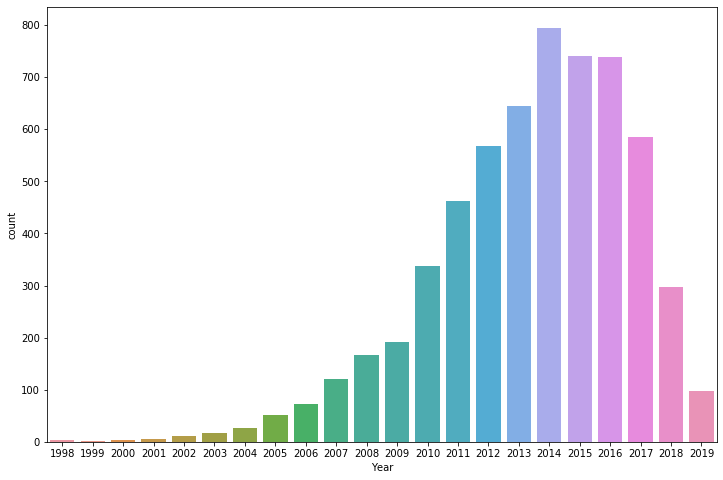

In [1070]:
plt.figure(figsize=(12,8))
sns.countplot(df['Year'])
plt.show()

- We see that there are a maximum sales in years 2012- 2017.

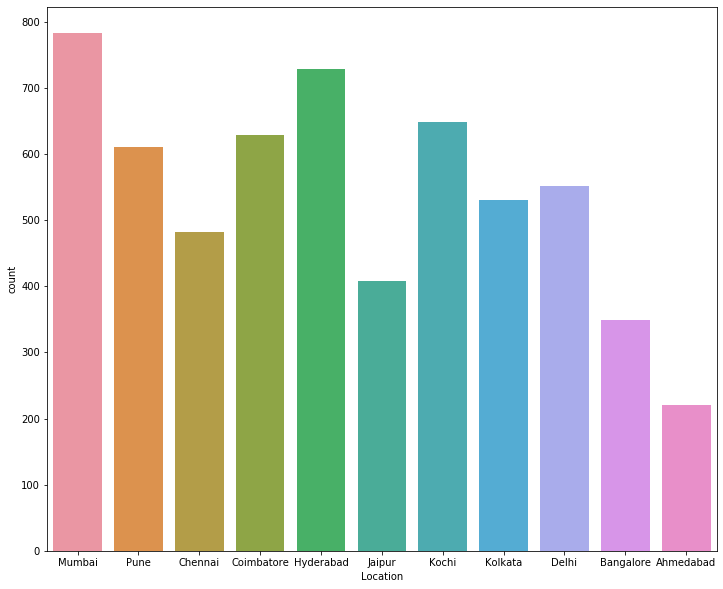

In [1071]:
plt.figure(figsize=(12,10))
sns.countplot(df['Location'])
plt.show()

- Mumbai has maximum purchases of cars, while Ahmedabad has the least.

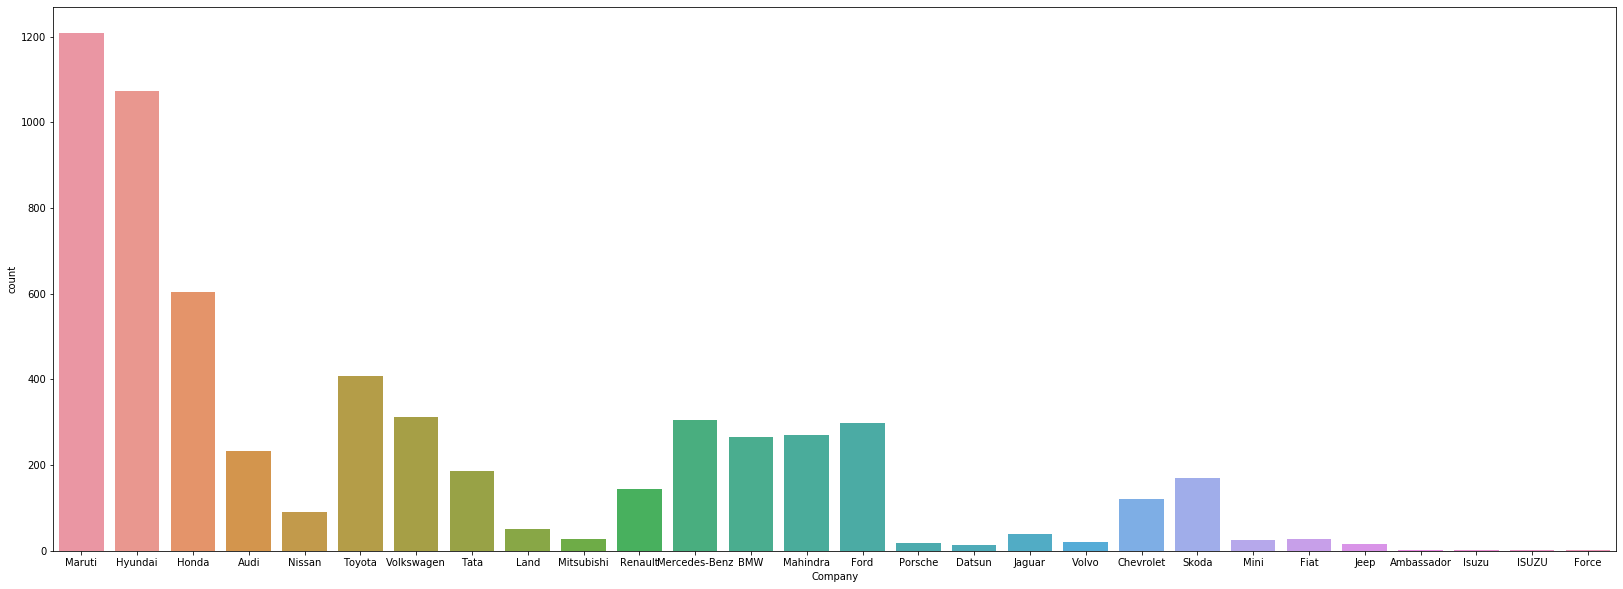

In [1072]:
plt.figure(figsize=(28,10))
sns.countplot(df['Company'])
plt.show()

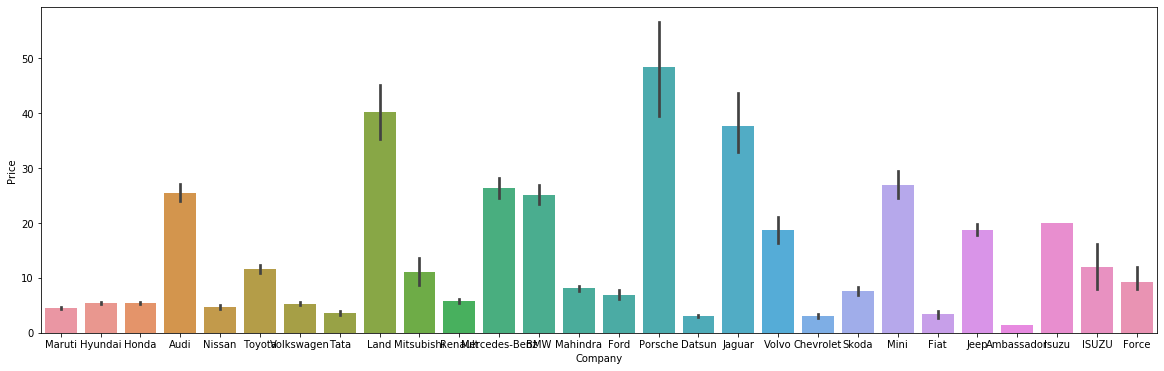

In [1073]:
plt.figure(figsize=(20,6))
sns.barplot(data=df,y='Price',x='Company')
plt.show()

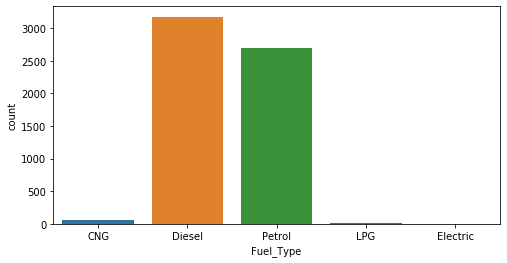

In [1074]:
plt.figure(figsize=(8,4))
sns.countplot(df['Fuel_Type'])
plt.show()

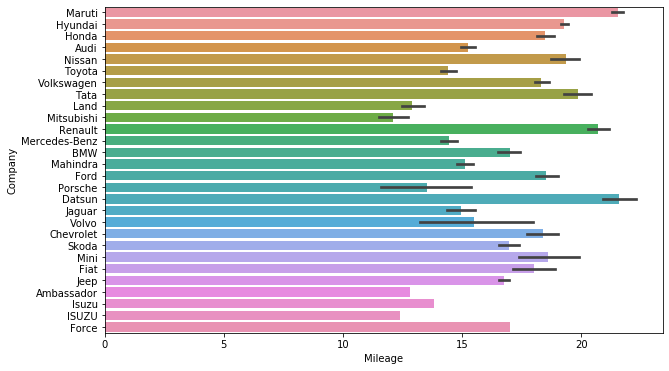

In [1075]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Mileage',y='Company')

In [1076]:
fuel=df['Fuel_Type'].value_counts()
fuel

Diesel      3174
Petrol      2698
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

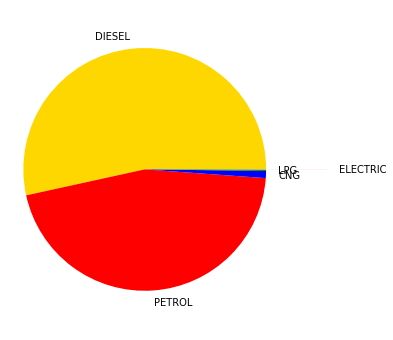

In [1077]:
plt.figure(figsize=(6,6))
labels=['DIESEL','PETROL','CNG','LPG','ELECTRIC']
colors=['gold','red','blue','green','pink']
explode=(0,0,0,0,0.5)
plt.pie(fuel,explode=explode,labels=labels,colors=colors)
plt.axis('equal')
plt.show()

Diesel vehicles are more followed by petro while LPG, CNG and electric are the least in number.

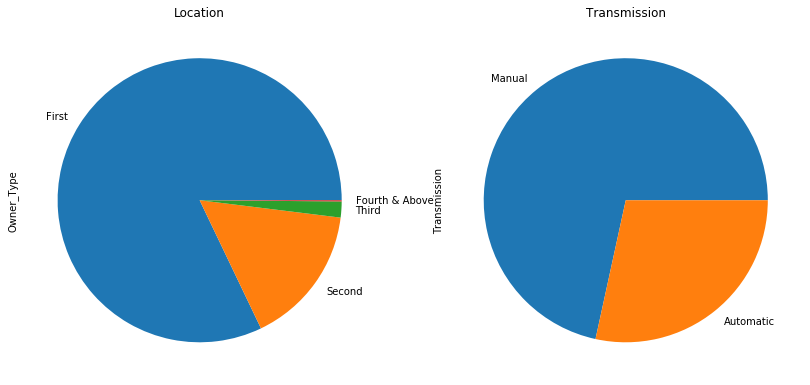

In [1078]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.title("Location")
df["Owner_Type"].value_counts().plot.pie()
plt.subplot(122)
plt.title("Transmission")
df["Transmission"].value_counts().plot.pie()

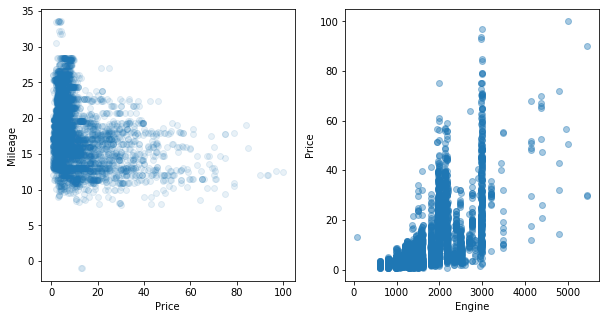

In [1079]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(df['Price'].values,df['Mileage'].values,alpha=0.1)
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.subplot(122)
plt.scatter(df['Engine'].values,df['Price'].values,alpha=0.4)
plt.xlabel("Engine")
plt.ylabel("Price")
plt.show()

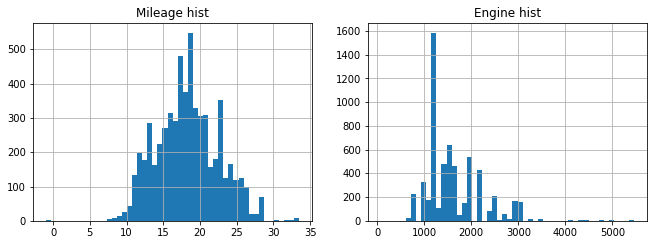

In [1080]:
plt.figure(figsize=(11,8))
plt.subplot(221)
df["Mileage"].hist(bins=50)
plt.title("Mileage hist")
plt.subplot(222)
df["Engine"].hist(bins=50)
plt.title("Engine hist")
plt.show()

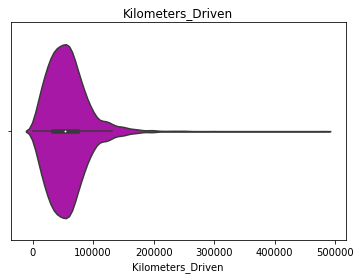

In [1081]:
plt.title('Kilometers_Driven')
sns.violinplot(x='Kilometers_Driven',data=df,color='m')
plt.show()

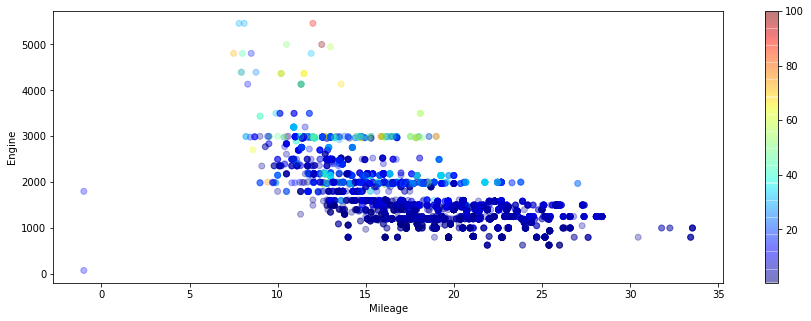

In [1082]:
x='Mileage'
y='Engine'
plt.figure(figsize=(15,5))
plt.scatter(df[x],df[y],c=df.Price,cmap='jet',alpha=0.3)
plt.xlabel(x)
plt.ylabel(y)
plt.colorbar()
plt.show()

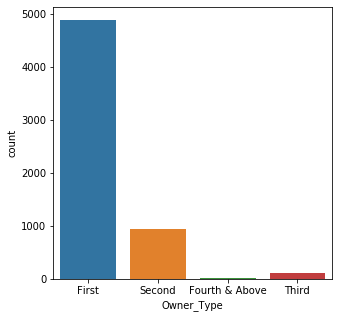

In [1083]:
plt.figure(figsize=(5,5))
sns.countplot(df['Owner_Type'])
plt.show()

- First hand cars are more followed by second and third.
- Third, fourth and above constitute very least amount of cars.

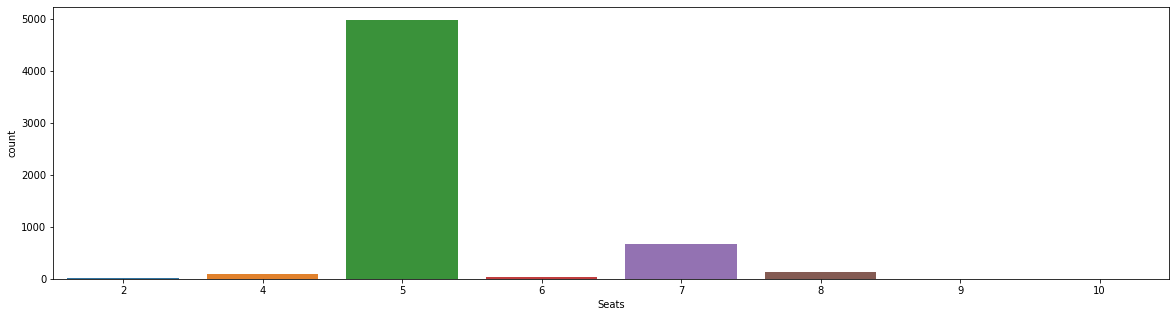

In [1084]:
plt.figure(figsize=(20,5))
sns.countplot(df['Seats'])
plt.show()

- Most of the cars are 5 seater, constituting majority while others are very small in number.

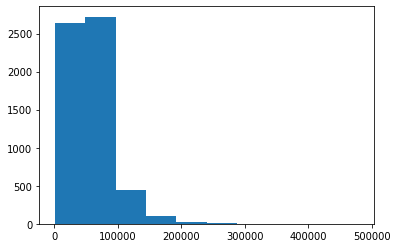

In [1085]:
x='Kilometers_Driven'
plt.hist(df['Kilometers_Driven'])
plt.show()

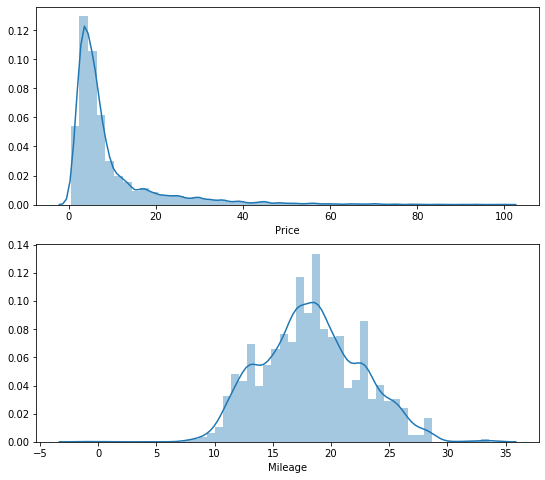

In [1086]:
plt.figure(figsize=(9,8))
plt.subplot(211)
sns.distplot(df['Price'],kde=True)
plt.subplot(212)
sns.distplot(df['Mileage'],kde=True)
plt.show()

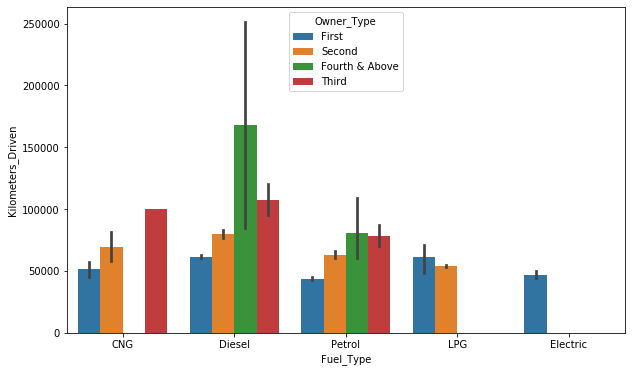

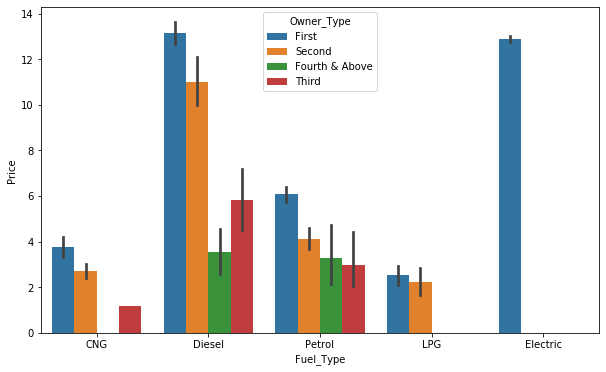

In [1087]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Fuel_Type',y='Kilometers_Driven',hue='Owner_Type')
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Fuel_Type',y='Price',hue='Owner_Type')

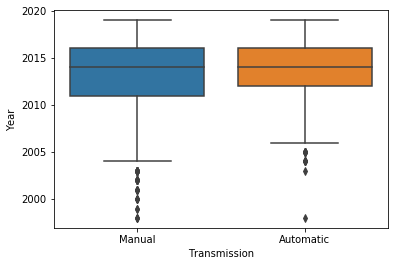

In [1088]:
sns.boxplot(x='Transmission',y='Year',data=df)
plt.show()

<Figure size 1440x360 with 0 Axes>

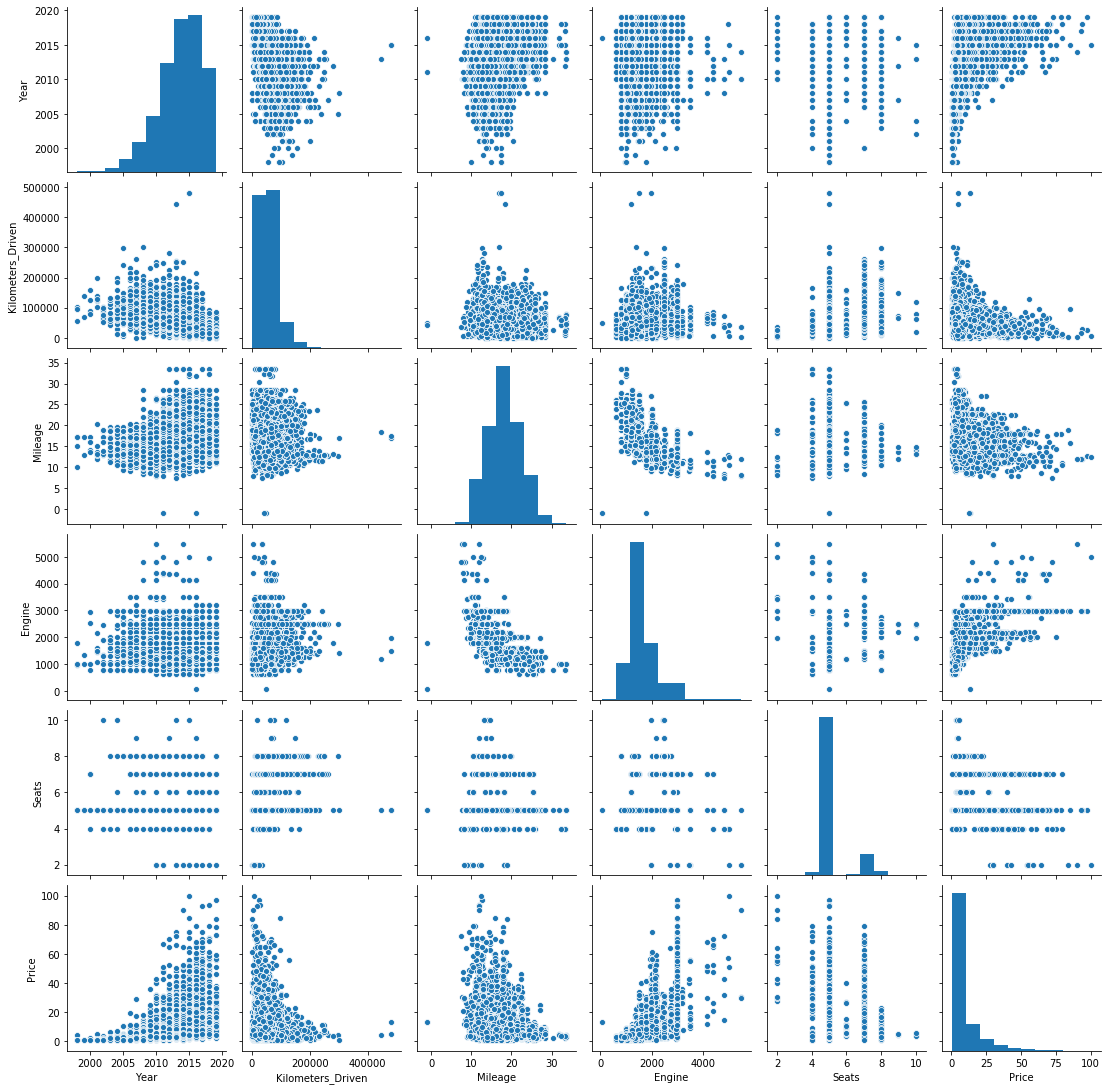

In [1089]:
plt.figure(figsize=(20,5))
sns.pairplot(data=df)

# ---------------------------------------------------------------------------------------------------------------

# Preprocessing:

In [1090]:
df.dtypes, df1.dtypes

(Location              object
 Year                   int64
 Kilometers_Driven      int64
 Fuel_Type             object
 Transmission          object
 Owner_Type            object
 Mileage              float64
 Engine                 int32
 Seats                  int32
 Price                float64
 Company               object
 Model                 object
 dtype: object,
 Location              object
 Year                   int64
 Kilometers_Driven      int64
 Fuel_Type             object
 Transmission          object
 Owner_Type            object
 Mileage              float64
 Engine                 int32
 Power                float64
 Seats                 object
 Company               object
 Model                 object
 dtype: object)

In [1091]:
X = df.drop(['Price'],axis=1)
y = df.iloc[:,-3].values

In [1092]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Company'] = label_encoder.fit_transform(X['Company'])
X['Model'] = label_encoder.fit_transform(X['Model'])
X['Location'] = label_encoder.fit_transform(X['Location'])
X['Fuel_Type'] = label_encoder.fit_transform(X['Fuel_Type'])
X['Transmission'] = label_encoder.fit_transform(X['Transmission'])
X['Owner_Type'] = label_encoder.fit_transform(X['Owner_Type'])

In [1093]:
X.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Company,Model
0,9,2010,72000,0,1,0,26.60,998,5,16,183
1,10,2015,41000,1,1,0,19.67,1582,5,9,51
2,2,2011,46000,4,1,0,18.20,1199,5,8,95
3,2,2012,87000,1,1,0,20.77,1248,7,16,67
4,3,2013,40670,1,0,2,15.20,1968,5,1,10


In [1094]:
df['Model'].value_counts()

Swift       353
City        267
i20         247
Verna       170
Innova      164
           ... 
Venture       1
Tiguan        1
Prius         1
SL-Class      1
Beetle        1
Name: Model, Length: 206, dtype: int64

In [1095]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1096]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4752, 11), (4752,), (1188, 11), (1188,))

In [1097]:
y_test=y_test.reshape(-1,1)
y_test.shape

(1188, 1)

In [1098]:
X.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Seats', 'Company', 'Model'],
      dtype='object')

# ---------------------------------------------------------------------------------------------------------------

# Training using Regression Models:

In [1099]:
SEED=1

In [1100]:
y

array([ 1.75, 12.5 ,  4.5 , ...,  2.9 ,  2.65,  2.5 ])

- Linear Regerssion

In [1101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
k=LinearRegression()
k.fit(X_train,y_train)
y_pred=k.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.6696593207012458
rmse: 5.893790775551847


- Ridge Regerssion

In [1102]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1,normalize=True,random_state=SEED)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.6696593207012458
rmse: 5.893790775551847


- Decision Tree Regression

In [1103]:
from sklearn.tree import DecisionTreeRegressor
j=DecisionTreeRegressor(random_state=SEED)
j.fit(X_train,y_train)
y_pred=j.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.7889219460965171
rmse: 4.711239978623099


- Bagging Regression

In [1104]:
from sklearn.ensemble import BaggingRegressor
j=DecisionTreeRegressor(random_state=SEED)
bc=BaggingRegressor(base_estimator=j,n_jobs=1)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.8527767879010685
rmse: 3.934611259285458


- Random Forest Regression

In [1105]:
from sklearn.ensemble import RandomForestRegressor
d=RandomForestRegressor(random_state=SEED)
d.fit(X_train,y_train)
y_pred=d.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.8878873619888029
rmse: 3.4335309917166255


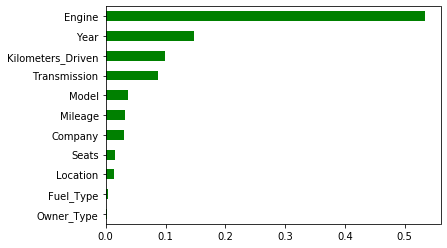

In [1106]:
importance_rf=pd.Series(d.feature_importances_,index=X.columns)
sorted_importances_d=importance_rf.sort_values()
sorted_importances_d.plot(kind='barh',color='green')
plt.show()

Fuel type and owner type are not important so we can remove those columns

In [1107]:
X=X.drop(['Fuel_Type','Owner_Type'],axis=1)

In [1108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

- Linear Regression

In [1109]:
from sklearn.linear_model import LinearRegression
k=LinearRegression()
k.fit(X_train,y_train)
y_pred=k.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.664714983111795
rmse: 5.937734287207535


- Ridge Regression

In [1110]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1,normalize=True,random_state=SEED)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.664714983111795
rmse: 5.937734287207535


- Decision Tree Regresion

In [1111]:
from sklearn.tree import DecisionTreeRegressor
j=DecisionTreeRegressor(random_state=SEED)
j.fit(X_train,y_train)
y_pred=j.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.7910188421934797
rmse: 4.687780319589301


- Bagging Regression

In [1112]:
from sklearn.ensemble import BaggingRegressor
b=DecisionTreeRegressor(random_state=SEED)
br=BaggingRegressor(base_estimator=j,n_jobs=1)
br.fit(X_train,y_train)
y_pred=br.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.8675190524587193
rmse: 3.732419062100938


- Random Forest Regression

In [1113]:
from sklearn.ensemble import RandomForestRegressor
d=RandomForestRegressor(random_state=SEED)
d.fit(X_train,y_train)
y_pred=d.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("R^2:",r2)
print("rmse:",rmse)

R^2: 0.8877778311677793
rmse: 3.4352078127504924


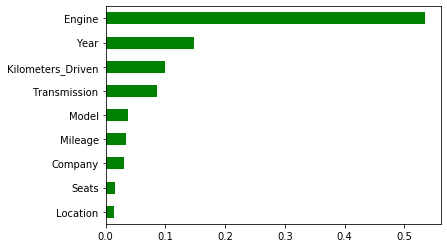

In [1114]:
importance_rf=pd.Series(d.feature_importances_,index=X.columns)
sorted_importances_d=importance_rf.sort_values()
sorted_importances_d.plot(kind='barh',color='green')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Testing on train dataset:

- After training and testing it on 20% of train dataset, now we test it on the whole train dataset to find the score, this is done by removing the Price column and applying the predict method, and then finding the scores between given price and predicted price.

## Final Score:

### Linear Regression

In [1115]:
pred=k.predict(X)
pred
df['Pred_price']=pred
rmse1 = sqrt(mean_squared_error(y,pred))
r21=r2_score(y,pred)
print("R^2:",r21)
print("rmse:",rmse1)
df

R^2: 0.6617695831983583
rmse: 6.301966197523591


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,-3.230343
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,9.523569
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,3.068573
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,-1.880899
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,19.546764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,5.941850
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,3.838461
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,11.233825
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,0.754202


### Ridge Regression

In [1116]:
pred=ridge.predict(X)
pred
df['Pred_price']=pred
rmse2 = sqrt(mean_squared_error(y,pred))
r22=r2_score(y,pred)
print("R^2:",r22)
print("rmse:",rmse2)
df

R^2: 0.6549951636852747
rmse: 6.364764373905928


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,-2.894991
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,9.086680
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,3.729060
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,-0.340013
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,19.443022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,5.297256
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,3.699047
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,11.343413
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,1.514886


### Decision Tree Regresion

In [1117]:
pred=j.predict(X)
pred
df['Pred_price']=pred
rmse3 = sqrt(mean_squared_error(y,pred))
r23=r2_score(y,pred)
print("R^2:",r23)
print("rmse:",rmse3)
df

R^2: 0.9625450288314753
rmse: 2.097125748444434


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,12.25
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,19.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,2.65


### Bagging Regression

In [1118]:
pred=br.predict(X)
pred
df['Pred_price']=pred
rmse4 = sqrt(mean_squared_error(y,pred))
r24=r2_score(y,pred)
print("R^2:",r24)
print("rmse:",rmse4)
df

R^2: 0.9571814956299567
rmse: 2.24225750210762


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,1.847
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,11.225
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,3.542
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,6.250
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,19.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,4.984
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,4.145
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,4.354
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,2.619


### Random Forest Regression

In [1119]:
pred=d.predict(X)
pred
df['Pred_price']=pred
rmse5 = sqrt(mean_squared_error(y,pred))
r25=r2_score(y,pred)
print("R^2:",r25)
print("rmse:",rmse5)
df

R^2: 0.9677536359978104
rmse: 1.9458533886304397


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,1.8651
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,11.3281
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,4.0962
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,6.0829
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,17.2369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,4.9686
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,4.1265
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,4.1221
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,2.7559


- Of all the models applied Random forest regresor gives highest r2 score and rmse score having values r2= 0.9677 or 96.7% and rmse= 1.945.

# ---------------------------------------------------------------------------------------------------------------

# Prediction:

In [1120]:
test=df1.copy()

In [1121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test['Company'] = label_encoder.fit_transform(test['Company'])
test['Model'] = label_encoder.fit_transform(test['Model'])
test['Location'] = label_encoder.fit_transform(test['Location'])
test['Fuel_Type'] = label_encoder.fit_transform(test['Fuel_Type'])
test['Transmission'] = label_encoder.fit_transform(test['Transmission'])
test['Owner_Type'] = label_encoder.fit_transform(test['Owner_Type'])

In [1122]:
test=test.drop('Power',axis=1)

In [1123]:
test.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
Company              0
Model                0
dtype: int64

In [1124]:
test=test.drop(['Fuel_Type','Owner_Type'],axis=1)

In [1125]:
y_pred=d.predict(test)

In [1126]:
price=y_pred

In [1127]:
test['price']=price
test.head()

,Location,Year,Kilometers_Driven,Transmission,Mileage,Engine,Seats,Company,Model,price
0,4,2014,40929,1,32.26,998,5,16,16,3.1009
1,3,2013,54493,1,24.70,796,5,16,16,2.8713
2,9,2017,34000,1,13.68,2393,5,26,78,18.2861
3,5,2012,139000,1,23.59,1364,7,26,60,5.3083
4,9,2014,29000,1,18.50,1197,5,9,159,4.0050


In [1128]:
df1['Price']=price
df1

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Model,Price
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,5,Maruti,Alto,3.1009
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5,Maruti,Alto,2.8713
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,5,Toyota,Innova,18.2861
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,-1.00,7,Toyota,Etios,5.3083
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5,Hyundai,i20,4.0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5,Volkswagen,Vento,3.8358
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5,Volkswagen,Polo,5.1063
1231,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,7,Nissan,Micra,3.0472
1232,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5,Volkswagen,Polo,3.9016


In [1129]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,1.8651
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,11.3281
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,4.0962
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,6.0829
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,17.2369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,4.9686
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,4.1265
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,4.1221
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,2.7559


In [1130]:
df1.to_excel("Final Output.xlsx")

# ---------------------------------------------------------------------------------------------------------------

# Summary:

## Final Predicted Score

### Linear Regression

In [1131]:
print("Model 1\n")
print("R^2:",r21)
print("rmse:",rmse1)

Model 1

R^2: 0.6617695831983583
rmse: 6.301966197523591


### Ridge Regression

In [1132]:
print("Model 2\n")
print("R^2:",r22)
print("rmse:",rmse2)

Model 2

R^2: 0.6549951636852747
rmse: 6.364764373905928


### Decision Tree Regression

In [1133]:
print("Model 3\n")
print("R^2:",r23)
print("rmse:",rmse3)

Model 3

R^2: 0.9625450288314753
rmse: 2.097125748444434


### Bagging Regresssion

In [1134]:
print("Model 4\n")
print("R^2:",r24)
print("rmse:",rmse4)

Model 4

R^2: 0.9571814956299567
rmse: 2.24225750210762


### Random Forest Regression

In [1135]:
print("Model 5\n")
print("R^2:",r25)
print("rmse:",rmse5)

Model 5

R^2: 0.9677536359978104
rmse: 1.9458533886304397


In [ ]:
##Predicted values for test dataset

In [1138]:
price

array([ 3.1009,  2.8713, 18.2861, ...,  3.0472,  3.9016, 16.189 ])

### Final predicted data for test dataset

In [1136]:
df1

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company,Model,Price
0,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,5,Maruti,Alto,3.1009
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5,Maruti,Alto,2.8713
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,5,Toyota,Innova,18.2861
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,-1.00,7,Toyota,Etios,5.3083
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5,Hyundai,i20,4.0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.60,5,Volkswagen,Vento,3.8358
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.60,5,Volkswagen,Polo,5.1063
1231,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.10,7,Nissan,Micra,3.0472
1232,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197,103.60,5,Volkswagen,Polo,3.9016


### Train dataset with predicted price

In [1137]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company,Model,Pred_price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5,1.75,Maruti,Wagon,1.8651
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5,12.50,Hyundai,Creta,11.3281
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5,4.50,Honda,Jazz,4.0962
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7,6.00,Maruti,Ertiga,6.0829
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5,17.74,Audi,A4,17.2369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5,4.75,Maruti,Swift,4.9686
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5,4.00,Hyundai,Xcent,4.1265
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8,2.90,Mahindra,Xylo,4.1221
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5,2.65,Maruti,Wagon,2.7559


### Conclusion:

- We conclude that Random Forest Regressor gives the maximum r2_score of 0.9677 and rsme score of 1.945.
- This model is highly suitble and gives us maximum efficiency.